# CAPSTONE Project: Car Evaluation

In [34]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os, re, time
import numpy as np
import scipy as sp
import scipy.sparse
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


from tqdm import tqdm_notebook

pd.set_option('display.max_columns', 50)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

# LOAD DATA
- https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
- The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

In [36]:
project_root = ''

In [37]:
col_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "Class"]        

In [38]:
df = pd.read_csv(os.path.join(project_root, 'car.data'), sep=',', names=col_names)

In [39]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
#Andrija konzultacije


In [93]:
df ["safety"].value_counts()

med     576
low     576
high    576
Name: safety, dtype: int64

In [ ]:
#missing values

In [104]:
df.isnull().sum()


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
Class       0
dtype: int64

In [ ]:
#nemam missing values

In [ ]:
#kraj konzultacije

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [41]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,4,4,med,med,unacc
freq,432,432,432,576,576,576,1210


In [42]:
for col_name in df.columns:
    print(df[col_name].value_counts())
    print("--------------")

med      432
low      432
vhigh    432
high     432
Name: buying, dtype: int64
--------------
med      432
low      432
vhigh    432
high     432
Name: maint, dtype: int64
--------------
4        432
5more    432
3        432
2        432
Name: doors, dtype: int64
--------------
4       576
more    576
2       576
Name: persons, dtype: int64
--------------
med      576
small    576
big      576
Name: lug_boot, dtype: int64
--------------
med     576
low     576
high    576
Name: safety, dtype: int64
--------------
unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64
--------------


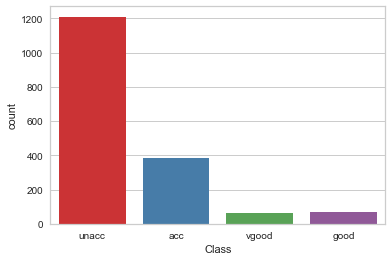

In [43]:
ax = sns.countplot(x="Class", data=df, palette='Set1')

## Exploratory data analysis

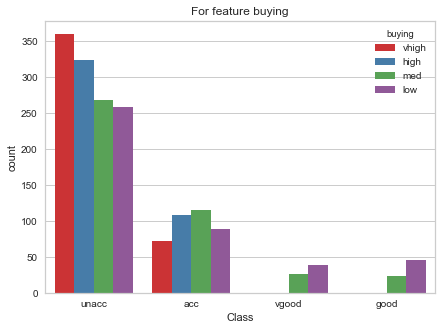

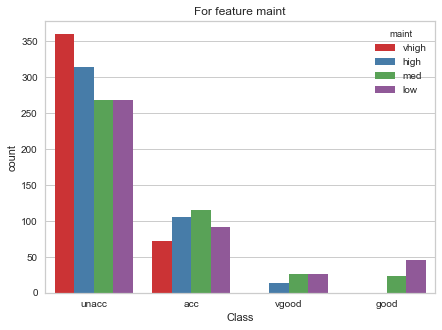

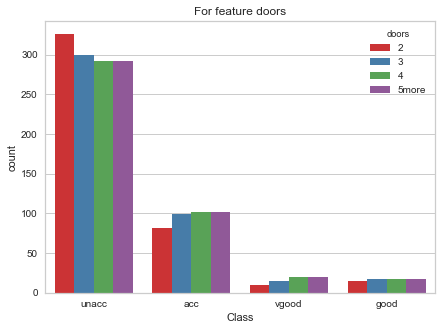

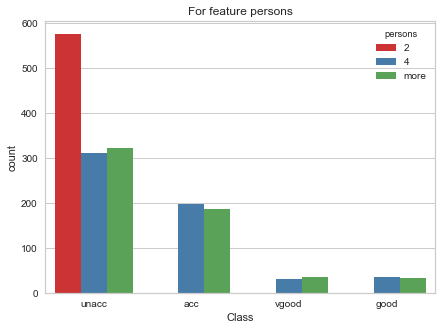

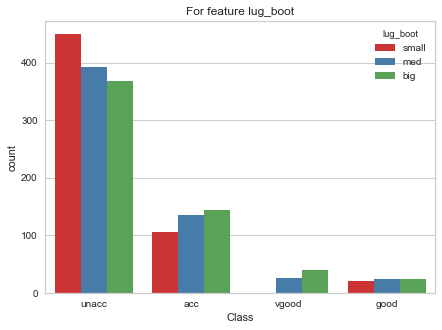

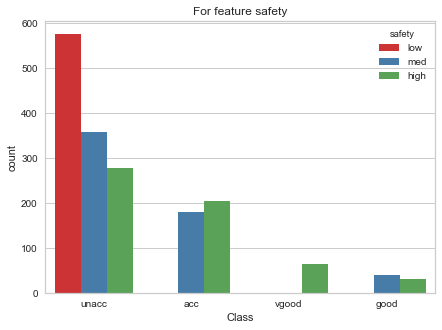

In [44]:
for col_name in df.columns[:-1]:
    plt.figure(figsize=(7,5))
    plt.title("For feature {}".format(col_name))
    sns.countplot(x="Class", hue=col_name, data=df, palette='Set1')

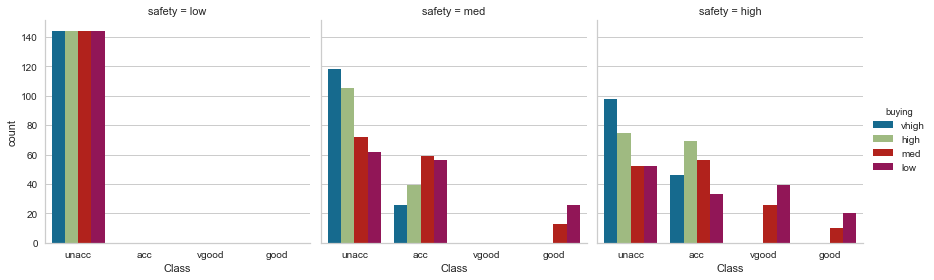

In [45]:
g = sns.catplot(x="Class", hue="buying", col="safety",
                data=df, kind="count",
                height=4, aspect=1);

In [46]:
df.groupby(['Class', 'safety', 'buying']).size()

Class  safety  buying
acc    high    high       69
               low        33
               med        56
               vhigh      46
       med     high       39
               low        56
               med        59
               vhigh      26
good   high    low        20
               med        10
       med     low        26
               med        13
unacc  high    high       75
               low        52
               med        52
               vhigh      98
       low     high      144
               low       144
               med       144
               vhigh     144
       med     high      105
               low        62
               med        72
               vhigh     118
vgood  high    low        39
               med        26
dtype: int64

In [47]:
df['safety'].value_counts()

med     576
low     576
high    576
Name: safety, dtype: int64

# Data preparation

In [15]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [16]:
X = df.drop(columns=['Class']).values
y = df['Class'].values

#X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

NameError: name 'train_test_split' is not defined

# CLASSIFICATION MODEL

In [74]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport, ROCAUC
from yellowbrick.classifier import ClassBalance, ClassPredictionError
from yellowbrick.classifier import DiscriminationThreshold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

## Prepare training and testing data for ML classification models

In [75]:
X = df.drop(columns=['Class'])
y = df['Class']

#X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [76]:
import category_encoders as ce

In [111]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: Class, Length: 1728, dtype: object

In [51]:
X.shape, X_test.shape

((1728, 6), (346, 6))

In [52]:
X.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [68]:
y_train.unique()

array(['unacc', 'acc', 'good', 'vgood'], dtype=object)

## Encode categorical variables

In [54]:
import category_encoders as ce

In [55]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
504,high,vhigh,4,more,small,low
533,high,vhigh,5more,more,small,high
1200,med,low,2,4,med,low
1144,med,med,4,4,small,med
1195,med,low,2,2,big,med


In [56]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [57]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [58]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
504,1,1,1,1,1,1
533,1,1,2,1,1,2
1200,2,2,3,2,2,1
1144,2,3,1,2,1,3
1195,2,2,3,3,3,3


In [59]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
805,1,2,4,1,2,3
50,4,1,4,1,2,2
1171,2,3,2,2,1,3
1177,2,3,2,2,3,3
395,4,2,1,2,3,2


## Learn ML model

In [60]:
#add only sklean part!

In [71]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [72]:
y_test.unique()

array(['acc', 'unacc', 'vgood', 'good'], dtype=object)

In [73]:
from sklearn.metrics import classification_report
sel_max_depth = 4
model = DecisionTreeClassifier(max_depth=sel_max_depth, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
class_names = y.unique() #thi
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

       unacc       0.53      0.81      0.64        79
         acc       0.00      0.00      0.00        10
       vgood       0.93      0.85      0.89       247
        good       0.00      0.00      0.00        10

    accuracy                           0.79       346
   macro avg       0.37      0.42      0.38       346
weighted avg       0.79      0.79      0.78       346



/home/sageusr/anaconda3/envs/ds3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MATERIALS
- https://github.com/sonarsushant/Car-Evaluation-Dataset-Classification/blob/master/Car%20Evaluation%20Dataset.ipynb
- https://github.com/deprak/car-evaluation-dataset/blob/master/car_data.ipynb
- https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial
- https://www.kaggle.com/prashant111/random-forest-classifier-tutorial
- https://github.com/ritvikkhanna09/Car-evaluation-using-pytorch